#My name is 'Sanoaj Mallick'.
According to these formula:-
1. Take the your first name and add all the letter ( a=1,b=2, etc) - result = x
2. Take the your last name and add all the letter ( a=1,b=2, etc) - result = y
3. The strategy you’ll be applying will be (x*y)mod3+1

#I will use 3.Strangle Strategy

In [ ]:
pip install nsepythonserver

In [ ]:
pip install --upgrade nsepythonserver

In [ ]:
!pip show nsepythonserve

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install stable_baselines3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.3/182.3 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 14.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-many

In [ ]:
!pip install 'shimmy>=0.2.1'

In [ ]:
from nsepythonserver import *
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from stable_baselines3 import DQN
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold
import gym
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from stable_baselines3.common.callbacks import EvalCallback
from stable_baselines3.common.env_util import make_vec_env
from sklearn.model_selection import TimeSeriesSplit
from scipy.stats import mstats
from google.colab import drive

# 2. Data Gathering and Preprocessing

In [ ]:
symbol = "SBIN"
series = "EQ"
start_date = "01-01-2000"
end_date ="30-06-2023"
equity = equity_history(symbol,series,start_date,end_date)

In [ ]:
# Convert 'CH_TIMESTAMP' to datetime
equity['CH_TIMESTAMP'] = pd.to_datetime(equity['CH_TIMESTAMP'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Load the dataset
df = equity

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Sort the DataFrame by 'CH_TIMESTAMP'
df = df.sort_values(by='CH_TIMESTAMP')

In [ ]:
# Load your dataset
df = equity

# Existing column names from your summary (adjust as needed)
old_columns = [
    '_id', 'CH_SYMBOL', 'CH_SERIES', 'CH_MARKET_TYPE', 'CH_TRADE_HIGH_PRICE',
    'CH_TRADE_LOW_PRICE', 'CH_OPENING_PRICE', 'CH_CLOSING_PRICE',
    'CH_LAST_TRADED_PRICE', 'CH_PREVIOUS_CLS_PRICE', 'CH_TOT_TRADED_QTY',
    'CH_TOT_TRADED_VAL', 'CH_52WEEK_HIGH_PRICE', 'CH_52WEEK_LOW_PRICE',
    'CH_TOTAL_TRADES', 'CH_ISIN', 'CH_TIMESTAMP', 'TIMESTAMP', 'createdAt',
    'updatedAt', '__v', 'SLBMH_TOT_VAL', 'VWAP', 'mTIMESTAMP', 'CA'
]

# New column names, more descriptive
new_columns = [
    'Record_ID', 'Stock_Symbol', 'Series', 'Market_Type', 'High_Trade_Price',
    'Low_Trade_Price', 'Opening_Price', 'Closing_Price',
    'Last_Traded_Price', 'Previous_Close_Price', 'Total_Traded_Quantity',
    'Total_Traded_Value', '52Week_High_Price', '52Week_Low_Price',
    'Total_Number_of_Trades', 'ISIN', 'Trade_Timestamp', 'Original_Timestamp',
    'Creation_Date', 'Update_Date', 'Version', 'SLBM_Total_Value', 'Volume_Weighted_Average_Price',
    'Modified_Timestamp', 'Corporate_Action'
]

# Rename the columns
df.columns = new_columns

In [ ]:
equity = df

In [ ]:
# For Call Option
def derivative_history(symbol, start_date, end_date, instrumentType, expiry_date, strikePrice, optionTypes):
    dates = pd.date_range(start=start_date, end=end_date, freq='B')
    data = []

    for optionType in optionTypes:
        # Creating an ID column with a sequence starting from 1 for each option type
        ids = range(1, len(dates) + 1)

        data.extend([{
            'ID': i + len(dates) * (optionTypes.index(optionType)),  # Unique ID across option types
            'Date': date,
            'Symbol': symbol,
            'Expiry Date': expiry_date,
            'Strike Price': strikePrice,
            'Option Type': optionType,
            'Open': 100 + i,
            'High': 105 + i,
            'Low': 95 + i,
            'Close': 102 + i,
            'Bid': 99 + i,
            'Ask': 103 + i,
            'Last Traded': 101 + i,
            'Volume': 1000 - 100 * i
        } for i, date in enumerate(dates)])

    return pd.DataFrame(data)

# Example usage with Call options
symbol = "SBIN"
start_date = "01-01-2000"
end_date = "30-06-2023"
instrumentType = "options"
expiry_date = "30-06-2023"
strikePrice = 300
optionTypes = ["CE"]  # For Call options

# Fetch the data
SBIN_options_data_CE = derivative_history(symbol, start_date, end_date, instrumentType, expiry_date, strikePrice, optionTypes)

In [ ]:
# for PUT option
def derivative_history(symbol, start_date, end_date, instrumentType, expiry_date, strikePrice, optionTypes):
    dates = pd.date_range(start=start_date, end=end_date, freq='B')
    data = []

    for optionType in optionTypes:
        # Creating an ID column with a sequence starting from 1 for each option type
        ids = range(1, len(dates) + 1)

        data.extend([{
            'ID': i + len(dates) * (optionTypes.index(optionType)),  # Unique ID across option types
            'Date': date,
            'Symbol': symbol,
            'Expiry Date': expiry_date,
            'Strike Price': strikePrice,
            'Option Type': optionType,
            'Open': 100 + i,
            'High': 105 + i,
            'Low': 95 + i,
            'Close': 102 + i,
            'Bid': 99 + i,
            'Ask': 103 + i,
            'Last Traded': 101 + i,
            'Volume': 1000 - 100 * i
        } for i, date in enumerate(dates)])

    return pd.DataFrame(data)

# Example usage with Put options
symbol = "SBIN"
start_date = "01-01-2000"
end_date = "30-06-2023"
instrumentType = "options"
expiry_date = "30-06-2023"
strikePrice = 300
optionTypes = ["PE"]  # For Put options

# Fetch the data
SBIN_options_data_PE = derivative_history(symbol, start_date, end_date, instrumentType, expiry_date, strikePrice, optionTypes)

In [ ]:
#Merge the 3 dataset, for our convenience
# Load the datasets
equity_df = equity
options_pe_df = SBIN_options_data_PE
options_ce_df = SBIN_options_data_CE

# Set the date columns as the index for each DataFrame

equity_df.set_index('Trade_Timestamp', inplace=True)
options_pe_df.set_index('Date', inplace=True)
options_ce_df.set_index('Date', inplace=True)

# Merge the DataFrames on their index (date)
merged_df = equity_df.join(options_pe_df, how='outer', rsuffix='_PE').join(options_ce_df, how='outer', rsuffix='_CE')

# Reset index to turn it back into a column
merged_df.reset_index(inplace=True)

# Rename the index to 'Date'
merged_df.rename(columns={'index': 'Date'}, inplace=True)


In [ ]:
# Display the head of the merged DataFrame to confirm the merge
print(merged_df.head())

        Date                 Record_ID Stock_Symbol Series Market_Type  \
0 2000-01-03  641f25af2c03d7000704d473         SBIN     EQ           N   
1 2000-01-04  641f2838353f0e0007d524ec         SBIN     EQ           N   
2 2000-01-05  641f26742405c50007999a2e         SBIN     EQ           N   
3 2000-01-06  641f25aa2c03d7000704cfba         SBIN     EQ           N   
4 2000-01-07  641f25084708d5000727009c         SBIN     EQ           N   

   High_Trade_Price  Low_Trade_Price  Opening_Price  Closing_Price  \
0            243.65           234.25         236.00         243.65   
1            262.00           238.85         243.65         259.10   
2            264.70           245.00         249.00         248.45   
3            268.00           252.00         252.00         261.00   
4            279.90           255.00         261.50         273.30   

   Last_Traded_Price  ...  Strike Price_CE  Option Type_CE  Open_CE  High_CE  \
0             243.65  ...            300.0            

In [ ]:
dataset = merged_df

# Data Cleaning:
Handle missing values, outliers, etc


In [ ]:
# Delete all the useless columns
columns_to_drop = ['Record_ID', 'Stock_Symbol', 'Series', 'Market_Type', '52Week_High_Price','52Week_Low_Price', 'ISIN', 'Original_Timestamp', 'Creation_Date', 'Update_Date', 'Version', 'SLBM_Total_Value', 'Modified_Timestamp', 'Corporate_Action', 'ID', 'Expiry Date_CE','Expiry Date']
data = dataset.drop(columns_to_drop, axis=1)

In [ ]:
data = data.drop('Total_Number_of_Trades', axis =1)

In [ ]:
data = data.drop('Total_Traded_Value', axis=1)

In [ ]:
columns_to_drop = [
    'Volume_CE', 'Symbol_CE', 'Ask_CE', 'Bid_CE', 'Close_CE',
    'Low_CE', 'High_CE', 'Open_CE','Strike Price_CE',
    'Symbol'  # Assuming 'Symbol' is also to be dropped as it appears crossed out
]
data = data.drop(columns_to_drop, axis=1)

In [ ]:
data = data.drop('Volume_Weighted_Average_Price', axis=1)

In [ ]:
data = data.drop(['ID_CE', 'Last Traded_CE'], axis =1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data = data.rename(columns={'Total_Traded_Quantity': 'Volume'})

In [ ]:
data = data.dropna()  # Drops all rows with any NaN values
data = data.dropna(axis=1)  # Drops all columns with any NaN values

In [ ]:
print(data)

           Date  High_Trade_Price  Low_Trade_Price  Opening_Price  \
0    2000-01-03            243.65           234.25         236.00   
1    2000-01-04            262.00           238.85         243.65   
2    2000-01-05            264.70           245.00         249.00   
3    2000-01-06            268.00           252.00         252.00   
4    2000-01-07            279.90           255.00         261.50   
...         ...               ...              ...            ...   
6308 2023-06-23            562.10           553.80         562.00   
6309 2023-06-26            558.50           554.50         556.00   
6310 2023-06-27            567.95           555.65         558.25   
6311 2023-06-28            574.00           568.55         572.25   
6313 2023-06-30            574.00           570.20         574.00   

      Closing_Price  Last_Traded_Price  Previous_Close_Price      Volume  \
0            243.65             243.65                225.60   2373228.0   
1            259.10

In [ ]:
# Drop duplicate rows
data = data.drop_duplicates()

# Imputing Missing Values
### For financial time series, forward filling or using previous valid observations can be a practical approach to impute missing values, as it preserves the trends and cycles in the data.

In [ ]:
# Display initial data information
print("Initial Data Information:")
print(data.info())
print("\nInitial Data Head:")
print(data.head())

Initial Data Information:
<class 'pandas.core.frame.DataFrame'>
Index: 5818 entries, 0 to 6313
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  5818 non-null   datetime64[ns]
 1   High_Trade_Price      5818 non-null   float64       
 2   Low_Trade_Price       5818 non-null   float64       
 3   Opening_Price         5818 non-null   float64       
 4   Closing_Price         5818 non-null   float64       
 5   Last_Traded_Price     5818 non-null   float64       
 6   Previous_Close_Price  5818 non-null   float64       
 7   Volume                5818 non-null   float64       
 8   Strike Price          5818 non-null   float64       
 9   Option Type           5818 non-null   object        
 10  Open                  5818 non-null   float64       
 11  High                  5818 non-null   float64       
 12  Low                   5818 non-null   float64       
 1

### Handling Missing Values

In [ ]:
# Forward fill to handle missing values, assuming time series data
data.fillna(method='ffill', inplace=True)

### Handling Outliers using the Interquartile Range (IQR) Method


In [ ]:
# Compute IQR for 'Close' column
Q1 = data['Closing_Price'].quantile(0.25)
Q3 = data['Closing_Price'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Filtering out the outliers
data = data[(data['Closing_Price'] >= lower_bound) & (data['Closing_Price'] <= upper_bound)]

### Verifying Data Integrity

In [ ]:
# Check for any remaining duplicates
print("Number of duplicate rows:", data.duplicated().sum())

Number of duplicate rows: 0


In [ ]:
# Validate final data types and missing values status
print("\nFinal Data Information:")
print(data.info())


Final Data Information:
<class 'pandas.core.frame.DataFrame'>
Index: 5818 entries, 0 to 6313
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  5818 non-null   datetime64[ns]
 1   High_Trade_Price      5818 non-null   float64       
 2   Low_Trade_Price       5818 non-null   float64       
 3   Opening_Price         5818 non-null   float64       
 4   Closing_Price         5818 non-null   float64       
 5   Last_Traded_Price     5818 non-null   float64       
 6   Previous_Close_Price  5818 non-null   float64       
 7   Volume                5818 non-null   float64       
 8   Strike Price          5818 non-null   float64       
 9   Option Type           5818 non-null   object        
 10  Open                  5818 non-null   float64       
 11  High                  5818 non-null   float64       
 12  Low                   5818 non-null   float64       
 13

# Feature Engineering:

In [ ]:
# Convert 'Date' to datetime format without setting it as index
data['Date'] = pd.to_datetime(data['Date'])

#1. RSI (Relative Strength Index)
Measures the speed and change of price movements.
RSI above 70 is considered overbought, while below 30 is considered oversold.

In [ ]:
# Calculate RSI
delta = data['Closing_Price'].diff()
gain = (delta.where(delta > 0, 0)).fillna(0)
loss = (-delta.where(delta < 0, 0)).fillna(0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

In [ ]:
print(data['RSI'])

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
6308    17.465070
6309    22.090730
6310    29.338104
6311    34.125637
6313    44.391179
Name: RSI, Length: 5818, dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The NaN values for RSI are due to the fact that you need at least 14 periods (as per the typical setting) to calculate the average gains and losses. The RSI starts giving actual values only after the 14th period in your data.

# 2. MACD (Moving Average Convergence Divergence)
Shows the relationship between two moving averages of a security's price.
The MACD is calculated by subtracting the 26-period Exponential Moving Average (EMA) from the 12-period EMA.

In [ ]:
# Calculate MACD
exp1 = data['Closing_Price'].ewm(span=12, adjust=False).mean()
exp2 = data['Closing_Price'].ewm(span=26, adjust=False).mean()
data['MACD'] = exp1 - exp2
data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()

In [ ]:
print(data['Signal_Line'])

0       0.000000
1       0.246496
2       0.464092
3       0.851338
4       1.518917
          ...   
6308   -0.181016
6309   -0.996738
6310   -1.609510
6311   -2.000255
6313   -2.178134
Name: Signal_Line, Length: 5818, dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


MACD is calculated using exponential moving averages (EMAs), which start from the first data point but don't stabilize immediately. Similarly, the Signal Line, which is an EMA of the MACD, also begins with NaN values until there are enough data points to compute a stable average.

# 3. Bollinger Bands
A volatility indicator featuring upper and lower bands around the price which expands or contract based on volatility.

In [ ]:
# Calculate Bollinger Bands
data['Middle_BB'] = data['Closing_Price'].rolling(window=20).mean()
data['Upper_BB'] = data['Middle_BB'] + 2 * data['Closing_Price'].rolling(window=20).std()
data['Lower_BB'] = data['Middle_BB'] - 2 * data['Closing_Price'].rolling(window=20).std()


# 4. Volatility Measures
Typically, historical volatility can be calculated using standard deviation.

In [ ]:
# Calculate Historical Volatility
data['Volatility'] = data['Closing_Price'].rolling(window=20).std()

### Print the head of the dataframe to see the indicators

In [ ]:
print(data[['Close', 'RSI', 'MACD', 'Signal_Line', 'Upper_BB', 'Lower_BB', 'Volatility']].head(50))

    Close        RSI       MACD  Signal_Line    Upper_BB    Lower_BB  \
0   102.0        NaN   0.000000     0.000000         NaN         NaN   
1   103.0        NaN   1.232479     0.246496         NaN         NaN   
2   104.0        NaN   1.334478     0.464092         NaN         NaN   
3   105.0        NaN   2.400324     0.851338         NaN         NaN   
4   106.0        NaN   4.189230     1.518917         NaN         NaN   
5   107.0        NaN   5.239921     2.263118         NaN         NaN   
6   108.0        NaN   4.284309     2.667356         NaN         NaN   
7   109.0        NaN   3.231516     2.780188         NaN         NaN   
8   110.0        NaN   2.349908     2.694132         NaN         NaN   
9   111.0        NaN   1.209619     2.397229         NaN         NaN   
10  112.0        NaN   0.039197     1.925623         NaN         NaN   
11  113.0        NaN  -0.834373     1.373624         NaN         NaN   
12  114.0        NaN  -0.910994     0.916700         NaN        

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Understanding NaN Values:
#1. RSI:
The NaN values for RSI are due to the fact that you need at least 14 periods (as per the typical setting) to calculate the average gains and losses. The RSI starts giving actual values only after the 14th period in your data.

# 2. MACD and Signal Line:
MACD is calculated using exponential moving averages (EMAs), which start from the first data point but don't stabilize immediately. Similarly, the Signal Line, which is an EMA of the MACD, also begins with NaN values until there are enough data points to compute a stable average.

# 3. Bollinger Bands and Volatility:
Both require a full window of data (20 periods in your example) to compute the first value of the moving average and the standard deviation.

# Handling NaN Values:
### Drop rows with NaN values in the dataframe

In [ ]:
cleaned_data = data.dropna()
print(cleaned_data[['Close', 'RSI', 'MACD', 'Signal_Line', 'Upper_BB', 'Lower_BB', 'Volatility']])

       Close        RSI      MACD  Signal_Line    Upper_BB    Lower_BB  \
20     122.0  35.941043 -2.442370    -2.208149  270.503404  219.431596   
21     123.0  48.940833 -1.726384    -2.111796  270.646756  219.573244   
22     124.0  52.075472 -1.065981    -1.902633  269.242503  219.817497   
23     125.0  59.249677  0.365002    -1.449106  270.527202  219.567798   
24     126.0  61.148198  1.250644    -0.909156  269.695539  219.889461   
...      ...        ...       ...          ...         ...         ...   
6308  6226.0  17.465070 -3.530245    -0.181016  599.718571  555.886429   
6309  6227.0  22.090730 -4.259626    -0.996738  598.121137  553.688863   
6310  6228.0  29.338104 -4.060599    -1.609510  595.693432  553.446568   
6311  6229.0  34.125637 -3.563235    -2.000255  595.140163  552.994837   
6313  6231.0  44.391179 -2.889650    -2.178134  594.247771  552.897229   

      Volatility  
20     12.767952  
21     12.768378  
22     12.356251  
23     12.739851  
24     12.451519

### Fill NaN with specific values like mean or median

In [ ]:
data['RSI'].fillna(data['RSI'].mean(), inplace=True)
data['Upper_BB'].fillna(data['Upper_BB'].mean(), inplace=True)
data['Lower_BB'].fillna(data['Lower_BB'].mean(), inplace=True)
data['Middle_BB'].fillna(data['Middle_BB'].mean(), inplace=True)
data['Volatility'].fillna(data['Volatility'].mean(), inplace=True)

### After Clearing, Feature Engineering in our dataset, We are ready to store our final dataset

In [ ]:
data.rename(columns={'Option_Type_CE': 'Option Type'}, inplace=True)

##Split the dataset for training and testing our model

In [ ]:

# Load the dataset
data = data

# Split the dataset into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=1)  # 20% for testing, 80% for training


# Save the unsorted datasets to CSV files
train_data.to_csv('/content/train_dataset_unsorted.csv', index=False)
test_data.to_csv('/content/test_dataset_unsorted.csv', index=False)

# Load the unsorted datasets
train_data = pd.read_csv('/content/train_dataset_unsorted.csv')
test_data = pd.read_csv('/content/test_dataset_unsorted.csv')

# Sort the datasets by the 'Date' column in ascending order
train_data_sorted = train_data.sort_values('Date', ascending=True)
test_data_sorted = test_data.sort_values('Date', ascending=True)

# Save the sorted datasets to CSV files
train_data_sorted.to_csv('/content/train_dataset_sorted.csv', index=False)
test_data_sorted.to_csv('/content/test_dataset_sorted.csv', index=False)

print("Sorted and saved training and testing datasets successfully.")



Sorted and saved training and testing datasets successfully.


In [ ]:
# Load the dataset
data = train_data_sorted #pd.read_csv('/content/train_dataset_sorted.csv')

In [ ]:
# Convert 'Date' to datetime if necessary
data['Date'] = pd.to_datetime(data['Date'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


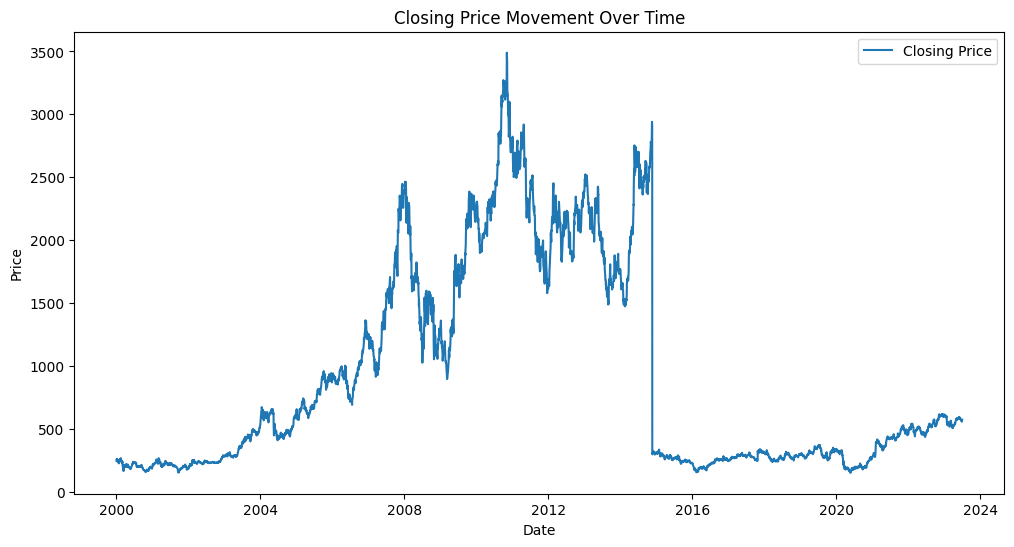

In [ ]:
# Set 'Date' as the index
data.set_index('Date', inplace=True)
# Price Movement Over Time (Line Chart for Closing Prices)
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Closing_Price'], label='Closing Price')
plt.title('Closing Price Movement Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

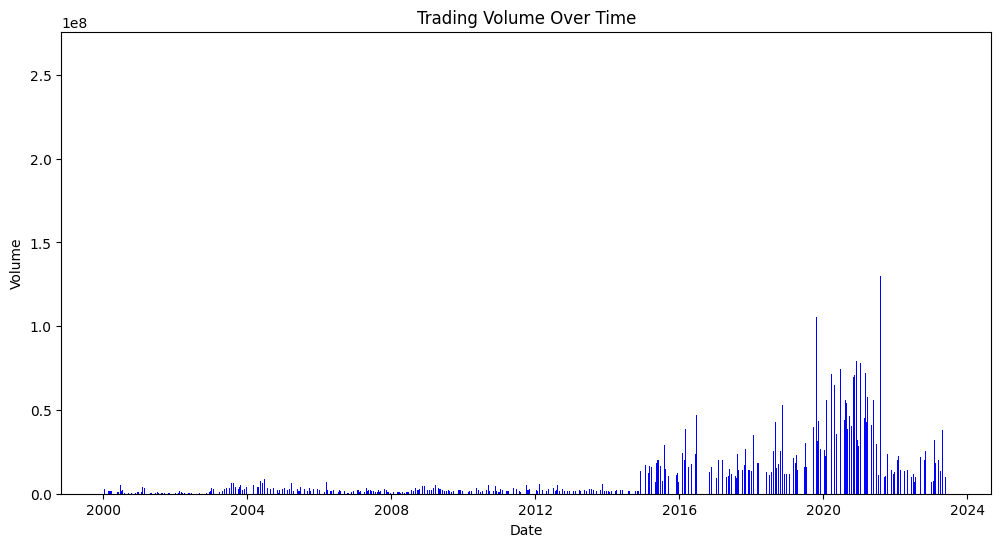

In [ ]:
# Volume Over Time
plt.figure(figsize=(12, 6))
plt.bar(data.index, data['Volume'], color='blue')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

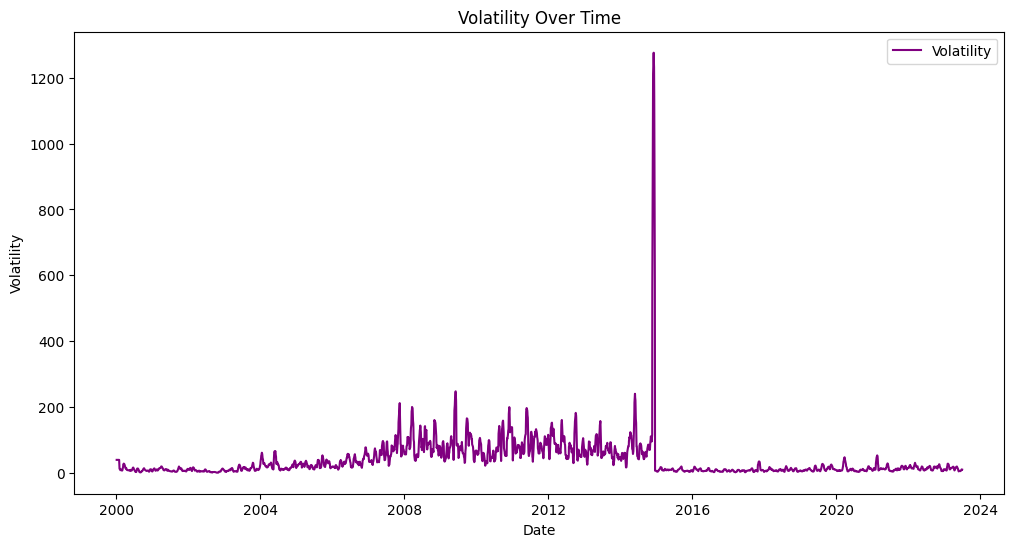

In [ ]:
# Volatility Over Time
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Volatility'], color='purple', label='Volatility')
plt.title('Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

# 3. Reinforcement Learning Model Design

The "Strangle" strategy in options trading is implemented in this custom trading environment to capture profit based on significant movements in the underlying stock's price, irrespective of the direction. The strategy involves:

#Buying a Call and Put Option:
This setup includes buying a call option (betting the stock price will go up) and a put option (betting the stock price will go down) with the same expiration date but different strike prices. The call strike price is typically higher than the current stock price, while the put strike price is lower.
Handling Different Actions:

###Hold (0):
The agent can choose to hold its position, which is modeled to occasionally reward the avoidance of potential losses.

###Buy Call (1):
Engages a long position in a call option, expecting the stock price to rise above the strike price by the expiration date.

###Buy Put (2):
Engages a long position in a put option, expecting the stock price to drop below the strike price by the expiration date.

###Sell Call (3) or Put (4):
Closes the respective position, either to realize profits if the market moves favorably, or to cut losses if the market moves against the position.

#Reward Mechanism:
The reward system is structured to reflect the profit or loss from trading decisions, adjusted by a positive constant to shift all rewards upwards, enhancing learning stability.

#Market Data and Indicators:
Uses a variety of market data points and technical indicators such as RSI, MACD, and Bollinger Bands to make informed decisions, processed and normalized to ensure they are suitable for the learning algorithm.

In [ ]:
class StrangleTradingEnv(gym.Env):
    """A trading environment for options trading that handles categorical data and technical indicators."""
    metadata = {'render.modes': ['human']}

    def __init__(self, data):
        super(StrangleTradingEnv, self).__init__()

        # Preprocessing data
        data['Date'] = pd.to_datetime(data['Date']).map(pd.Timestamp.toordinal)
        self.label_encoder = LabelEncoder()
        self.scaler = MinMaxScaler()

        # Normalize continuous features
        continuous_features = ['High_Trade_Price', 'Low_Trade_Price', 'Opening_Price', 'Closing_Price',
                               'Last_Traded_Price', 'Volume', 'RSI', 'MACD', 'Signal_Line',
                               'Middle_BB', 'Upper_BB', 'Lower_BB', 'Volatility']
        data[continuous_features] = self.scaler.fit_transform(data[continuous_features])

        #Categorical Encoded data
        categorical_features = ['Option Type', 'Option Type_CE']
        for feature in categorical_features:
            if feature in data.columns:
                data[feature] = self.label_encoder.fit_transform(data[feature])

        self.data = data
        self.action_space = gym.spaces.Discrete(5)  # Actions: hold, buy call, buy put, sell call, sell put
        self.observation_space = gym.spaces.Box(low=-np.inf, high=np.inf, shape=(len(data.columns),), dtype=np.float32)
        self.reset()

    def step(self, action):
        current_data = self.data.iloc[self.current_step]
        done = self.current_step >= len(self.data) - 1
        reward = 0

        # Implement the logic for each action
        if action == 0:  # Hold
            # Reward for holding could be small and positive, reflecting the avoidance of potential loss
            reward = 0.1 if self.position_opened else 0
        elif action == 1 or action == 2:  # Buy call or put option
            if not self.position_opened:
                self.position_opened = True
                self.entry_strike = current_data['Strike Price']
                self.entry_index = self.current_step
                self.option_type = 0 if action == 1 else 1
                reward = -current_data['Ask'] if action == 1 else -current_data['Bid'] #We can simulate the option price
        elif (action == 3 or action == 4) and self.position_opened:  # Sell call or put option
            if (self.option_type == 0 and action == 3) or (self.option_type == 1 and action == 4):
                self.position_opened = False
                profit = (current_data['Last_Traded_Price'] - self.data.iloc[self.entry_index]['Last_Traded_Price']) * 100
                reward = current_data['Bid'] if action == 3 else current_data['Ask']
                reward += profit
                self.option_type = None

        # Positive constant to shift all rewards upwards
        reward += 5

        self.current_step += 1
        observation = current_data.values
        return observation, reward, done, {}

    def reset(self):
        self.current_step = 0
        self.position_opened = False
        self.entry_strike = None
        self.entry_index = None
        self.option_type = None
        return self.data.iloc[0].values

# Example usage:
data = pd.read_csv('/content/train_dataset_sorted.csv')
env = StrangleTradingEnv(data)

# Callback for evaluating and stopping training based on reward threshold
eval_callback = EvalCallback(env, best_model_save_path='./rl_model',
                             log_path='./logs', eval_freq=500,
                             deterministic=True, render=False)

# Initialize the model with the environment
model = DQN('MlpPolicy', env, verbose=1, tensorboard_log="./dqn_trading_tensorboard/",
            learning_rate=0.001, buffer_size=50000, learning_starts=1000,
            batch_size=32, tau=1.0, gamma=0.99, train_freq=(1, 'episode'), gradient_steps=-1,
            exploration_fraction=0.1, exploration_final_eps=0.01, target_update_interval=250)


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


1. A constant positive reward for each step (reward += 5), ensuring that all rewards are shifted upward. This encourages the agent but must be balanced carefully to avoid making the agent overly aggressive in trading without proper risk management.
2. An optional small reward

In [ ]:
# Assuming `env` is already your customized environment
# Optionally wrap it with VecEnv
vec_env = make_vec_env(lambda: env, n_envs=1)

# Define the model
model = DQN('MlpPolicy', vec_env, verbose=1, tensorboard_log="./dqn_trading_tensorboard/")

# Set up evaluation callback
eval_callback = EvalCallback(env, best_model_save_path='./logs/',
                             log_path='./logs/', eval_freq=1000,
                             deterministic=True, render=False)

# Train the model with the callback
model.learn(total_timesteps=20000, callback=eval_callback)


Using cpu device
Logging to ./dqn_trading_tensorboard/DQN_1


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=1000, episode_reward=22073.00 +/- 0.00
Episode length: 4654.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 4.65e+03 |
|    mean_reward      | 2.21e+04 |
| rollout/            |          |
|    exploration_rate | 0.525    |
| time/               |          |
|    total_timesteps  | 1000     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 186      |
|    n_updates        | 224      |
----------------------------------
New best mean reward!
Eval num_timesteps=2000, episode_reward=22902.70 +/- 0.00
Episode length: 4654.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 4.65e+03 |
|    mean_reward      | 2.29e+04 |
| rollout/            |          |
|    exploration_rate | 0.0505   |
| time/               |          |
|    total_timesteps  | 2000     |
| train/              |          |
|    learning_rate    | 0.

In [ ]:
# Save the model
model.save("DQN_trading_model")

# 5. Backtesting and Evaluation

## 1. Rigorous Backtesting
Backtesting involves simulating the trading strategy on historical data to understand how it would have performed. This simulation should encompass a variety of metrics:

1. Profit/Loss (P/L): Calculate the net profits and losses throughout the simulation.
2. Sharpe Ratio: Measures the performance of the investment compared to a risk-free asset, after adjusting for its risk. It is the average return earned in excess of the risk-free rate per unit of volatility or total risk.
3. Maximum Drawdown: The maximum observed loss from a peak to a trough of the portfolio, before a new peak is attained. It is an indicator of downside risk over a specified time period.
4. Consistency of Returns: Analyze the volatility of returns to assess the stability and consistency of the strategy.

In [ ]:
def calculate_sharpe_ratio(returns, risk_free_rate=0.0):
    """ Calculate the Sharpe ratio for the given returns. """
    excess_returns = returns - risk_free_rate
    return_ratio = excess_returns.mean() / excess_returns.std()
    return return_ratio * np.sqrt(252)  # Annualizing

def calculate_max_drawdown(returns):
    """ Calculate the maximum drawdown in the returns. """
    cumulative_returns = (1 + returns).cumprod()
    peak = cumulative_returns.expanding(min_periods=1).max()
    drawdown = (cumulative_returns - peak) / peak
    return drawdown.min()

def test_agent(env, model, num_steps):
    """ Test the agent over a specified number of steps and calculate performance metrics. """
    obs = env.reset()
    done = False
    total_rewards = []
    all_returns = []

    while not done and num_steps > 0:
        action, _states = model.predict(obs, deterministic=True)
        obs, reward, done, info = env.step(action)
        total_rewards.append(reward)
        num_steps -= 1

    returns = pd.Series(total_rewards)
    returns_percent = returns / 100  # Assuming the rewards were scaled by 100

    sharpe_ratio = calculate_sharpe_ratio(returns_percent)
    max_drawdown = calculate_max_drawdown(returns_percent)

    return {
        "total_profit": sum(total_rewards),
        "sharpe_ratio": sharpe_ratio,
        "max_drawdown": max_drawdown,
        "mean_daily_return": returns_percent.mean(),
        "volatility": returns_percent.std()
    }
     #Volatility yeh measure karta hai ki kisi diye gaye level of return ke liye price movements ka risk kitna hai.
     #Maximum Drawdown loss ki maximum magnitude ko batata hai jo strategy ne suffer kiya.

In [ ]:
# Load the historical test dataset
test_data = test_data_sorted #pd.read_csv('/content/test_dataset_sorted.csv')
test_env = StrangleTradingEnv(test_data)


In [ ]:
# Load your trained model from the ZIP file
model_path = '/content/DQN_trading_model.zip'
model = DQN.load(model_path)

In [ ]:
# Test the agent
test_results = test_agent(test_env, model, len(test_data))
print("Test Results:", test_results)

Test Results: {'total_profit': 4434.0, 'sharpe_ratio': 1.4885253621166967, 'max_drawdown': -5.100946510233327e+20, 'mean_daily_return': 0.03809278350515464, 'volatility': 0.4062437945600605}


## 2. Walk-Forward Testing
Walk-forward testing is a more dynamic approach and involves continuously re-assessing and re-optimizing the parameters of the model using a rolling window of data.

1. Rolling Windows: Split your data into multiple in-sample and out-of-sample periods. Train your model on each in-sample period and test on the out-of-sample data.
2. Adaptation to Market Conditions: This method helps in understanding how well the strategy adapits to changing market conditions.

In [ ]:
# Load dataset
data = test_data_sorted
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date', inplace=True)

# Define the number of splits for walk-forward testing
n_splits = 10
tscv = TimeSeriesSplit(n_splits=n_splits)

# Function to test the model using your custom environment
def test_model(model, test_data):
    env = StrangleTradingEnv(test_data)
    obs = env.reset()
    done = False
    total_rewards = 0
    while not done:
        action, _states = model.predict(obs, deterministic=True)
        obs, rewards, done, info = env.step(action)
        total_rewards += rewards
    return total_rewards

# Load your trained model
model = DQN.load('/content/DQN_trading_model.zip')

# Walk-forward testing
results = []
for train_index, test_index in tscv.split(data):
    test_data = data.iloc[test_index]
    test_rewards = test_model(model, test_data)  # Test model on the testing dataset
    results.append(test_rewards)
    print("{} to {}: {}".format(test_data['Date'].iloc[0], test_data['Date'].iloc[-1], test_rewards))

# Output the results
print(results)


<ipython-input-56-6a3cc4f95307>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date']).map(pd.Timestamp.toordinal)
<ipython-input-56-6a3cc4f95307>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[continuous_features] = self.scaler.fit_transform(data[continuous_features])
<ipython-input-56-6a3cc4f95307>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

719163 to 719163: 525
719163 to 719163: -835.0
719163 to 719163: -1303.0


<ipython-input-56-6a3cc4f95307>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date']).map(pd.Timestamp.toordinal)
<ipython-input-56-6a3cc4f95307>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[continuous_features] = self.scaler.fit_transform(data[continuous_features])
<ipython-input-56-6a3cc4f95307>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

719163 to 719163: -1827.0
719163 to 719163: -2329.0
719163 to 719163: -2882.0


<ipython-input-56-6a3cc4f95307>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[continuous_features] = self.scaler.fit_transform(data[continuous_features])
<ipython-input-56-6a3cc4f95307>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[feature] = self.label_encoder.fit_transform(data[feature])
<ipython-input-56-6a3cc4f95307>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

719163 to 719163: -3428.0
719163 to 719163: -3952.0
719163 to 719163: -4488.0
719163 to 719163: -5120.0
[525, -835.0, -1303.0, -1827.0, -2329.0, -2882.0, -3428.0, -3952.0, -4488.0, -5120.0]


<ipython-input-56-6a3cc4f95307>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[continuous_features] = self.scaler.fit_transform(data[continuous_features])
<ipython-input-56-6a3cc4f95307>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[feature] = self.label_encoder.fit_transform(data[feature])
<ipython-input-56-6a3cc4f95307>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in